# Simple Linear Regression

### From Scratch

In [117]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

print('Hello Tejas!')

Hello Tejas!


In [118]:
# data 
from ISLP import load_data
raw = load_data('Boston')
print(f'Shape of data: {raw.shape}')

Shape of data: (506, 13)


In [119]:
raw.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [120]:
x = np.array(raw['lstat'].copy())
y = np.array(raw['medv'].copy())

print(f'Shape of x: {x.shape}')
print(f'Shape of y: {y.shape}')

Shape of x: (506,)
Shape of y: (506,)


In [121]:
# Correlation
print(f'Correlation between x and y : \n {np.corrcoef(x,y)}')

Correlation between x and y : 
 [[ 1.         -0.73766273]
 [-0.73766273  1.        ]]


In [122]:
# Simple - Linear Regression
x_bar = x.mean()
y_bar = y.mean()

b1 = np.sum((x - x_bar) * (y - y_bar)) / np.sum((x - x_bar)**2)
b0 = y_bar - (b1*x_bar)

print(f'Simple Linear Regression Equation: y = {np.round(b0,4)} + {np.round(b1,4)}x')

Simple Linear Regression Equation: y = 34.5538 + -0.95x


In [123]:
# prediction
y_pred = b0 + (b1 * x)

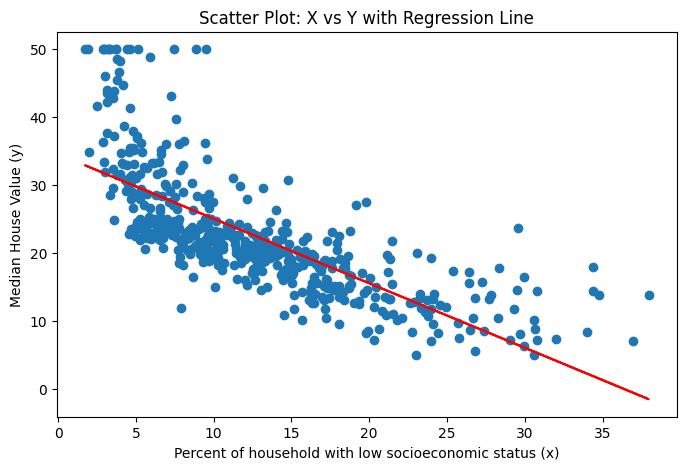

In [124]:
# scatter plot
fig, ax = subplots(figsize = (8,5))

ax.plot(x,y_pred, color = 'r')
ax.scatter(x,y)
ax.set_xlabel('Percent of household with low socioeconomic status (x)')
ax.set_ylabel('Median House Value (y)')
ax.set_title('Scatter Plot: X vs Y with Regression Line')
fig.show()

In [125]:
# evaluation metrics
sse = np.sum((y_pred - y)**2)
sst = np.sum((y_bar - y)**2)
r2 = (sst - sse) / sst
mse = sse / (len(x))
rmse = np.sqrt(mse)
print(f'R-Squared: {np.round(r2,4)}')
print(f'RMSE: {np.round(rmse,4)}')
print(f'MSE: {np.round(mse,4)}')

R-Squared: 0.5441
RMSE: 6.2035
MSE: 38.483


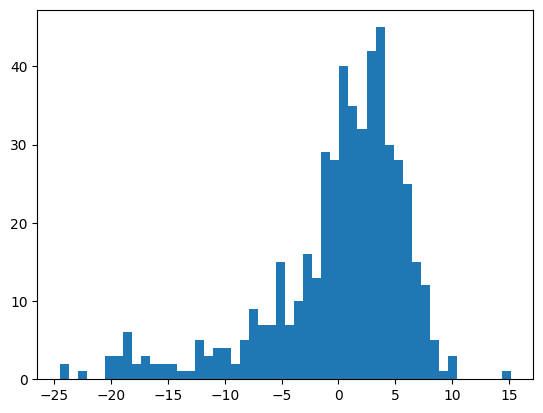

In [133]:
fig, ax = subplots()
ax.hist((y_pred - y), bins = 50)
fig.show()

# ISLP

In [82]:
# data
data = load_data('Boston')
print(f'Shape of data: {data.shape}')

Shape of data: (506, 13)


In [83]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [84]:
xraw = data['lstat'].copy()
yraw = data['medv'].copy()

In [85]:
# Linear Regression - OLS
import statsmodels.api as sm

x = sm.add_constant(xraw)
model = sm.OLS(yraw,x)
results = model.fit()

In [86]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           5.08e-88
Time:                        20:18:49   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [87]:
y_pred = results.predict(x)

In [97]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
print(f'R-Squared: {np.round(r2_score(y, y_pred), 4)}')
print(f'RSME: {np.round(root_mean_squared_error(y, y_pred), 4)}')
print(f'MSE: {np.round(mean_squared_error(y, y_pred), 4)}')

R-Squared: 0.5441
RSME: 6.2035
MSE: 38.483
